In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dataset
df=pd.read_csv("data_project.csv",sep=";",encoding = "ISO-8859-1")
df.head()

,SAP_Code,Project_Name,Country,RD,Total_Cost_m.ua,bank_contrib_m_ua,Country_type,Sector,PCR_Year,peoples
0,P-CV-DA0-002,CONSTRUCTION D'1 NOUVEL AEROPORT A PRAIA,Cape Verde,RDGW,28.456,6.544000,ADB,Transport,2006,114985
1,P-CV-DB0-002,PROJET ROUTIER,Cape Verde,RDGW,3.890,3.241311,ADB,Transport,2007,87490
2,P-Z1-F00-013,NGA/TGO/BEN.POWER SYST.INTERC.PROJ.,Multinational,RDGW,35.020,11.027217,ADF,Power,2008,968266
3,P-CV-IAH-001,Projet dAppui Institutionnel au Secteur de l...,Cape Verde,RDGW,1.050,0.985109,ADB,Education,2010,3694
4,P-Z1-DB0-010,Aménagement de la Route Kankan - Kouremale - B...,Multinational,RDGW,101.580,24.000000,ADF,Transport,2010,266982


In [4]:
# Transform categorials features into dummies variables
df_dummy=pd.concat ([pd.get_dummies(df[['RD','Country_type','Sector']]),df[['bank_contrib_m_ua','peoples']]],axis=1)
df_dummy.head()

,RD_RDGC,RD_RDGE,RD_RDGN,RD_RDGS,RD_RDGW,Country_type_ADB,Country_type_ADF,Sector_Agriculture,Sector_Education,Sector_Health,Sector_Microfinance,Sector_Power,Sector_Transport,Sector_Water Sup/Sanit,bank_contrib_m_ua,peoples
0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,6.544000,114985
1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,3.241311,87490
2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,11.027217,968266
3,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0.985109,3694
4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,24.000000,266982


In [6]:
# Split intial datasets into train (80%), validation (10%) and test (10%) datasets
train_dataset = df_dummy.sample(frac=0.8,random_state=0)
test_val_dataset = df_dummy.drop(train_dataset.index)

val_dataset=test_val_dataset.sample(frac=0.5,random_state=0)
test_dataset=test_val_dataset.drop(val_dataset.index)

In [7]:
# Visualise datasets shape
print("Training dataset size = ",train_dataset.shape[0])
print("Validation dataset size = ",val_dataset.shape[0])
print("Test dataset size = ",test_dataset.shape[0])

Training dataset size =  383
Validation dataset size =  48
Test dataset size =  48


In [31]:
#Neural Network model
def build_model():
    
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())-1]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    
    return model

In [32]:
# Load model
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1024      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Define input features and target feature

X_train=train_dataset.drop(['peoples'],axis=1)
Y_train=train_dataset[['peoples']]

X_val=val_dataset.drop(['peoples'],axis=1)
Y_val=val_dataset[['peoples']]

X_test=test_dataset.drop(['peoples'],axis=1)
Y_test=test_dataset[['peoples']]

In [34]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [35]:
# The patience parameter is the amount of epochs to check for improvement
checkpointer = keras.callbacks.ModelCheckpoint(filepath='training.ckpt',
                                               verbose=1, save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)

history= model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=1000,verbose=0,
                   callbacks=[early_stop, PrintDot(),checkpointer])


.
Epoch 00001: val_loss improved from inf to 4199448663381.33350, saving model to training.ckpt
.
Epoch 00002: val_loss improved from 4199448663381.33350 to 4199425594709.33350, saving model to training.ckpt
.
Epoch 00003: val_loss improved from 4199425594709.33350 to 4199397982208.00000, saving model to training.ckpt
.
Epoch 00004: val_loss improved from 4199397982208.00000 to 4199359709184.00000, saving model to training.ckpt
.
Epoch 00005: val_loss improved from 4199359709184.00000 to 4199306581333.33350, saving model to training.ckpt
.
Epoch 00006: val_loss improved from 4199306581333.33350 to 4199226015744.00000, saving model to training.ckpt
.
Epoch 00007: val_loss improved from 4199226015744.00000 to 4199116614314.66650, saving model to training.ckpt
.
Epoch 00008: val_loss improved from 4199116614314.66650 to 4198984318976.00000, saving model to training.ckpt
.
Epoch 00009: val_loss improved from 4198984318976.00000 to 4198799944362.66650, saving model to training.ckpt
.
Epoch

.
Epoch 00078: val_loss improved from 3766934306816.00000 to 3753945770666.66650, saving model to training.ckpt
.
Epoch 00079: val_loss improved from 3753945770666.66650 to 3738810275157.33350, saving model to training.ckpt
.
Epoch 00080: val_loss improved from 3738810275157.33350 to 3725845506730.66650, saving model to training.ckpt
.
Epoch 00081: val_loss improved from 3725845506730.66650 to 3711148665514.66650, saving model to training.ckpt
.
Epoch 00082: val_loss improved from 3711148665514.66650 to 3698665018709.33350, saving model to training.ckpt
.
Epoch 00083: val_loss improved from 3698665018709.33350 to 3684932517888.00000, saving model to training.ckpt
.
Epoch 00084: val_loss improved from 3684932517888.00000 to 3671157374976.00000, saving model to training.ckpt
.
Epoch 00085: val_loss improved from 3671157374976.00000 to 3657652589909.33350, saving model to training.ckpt
.
Epoch 00086: val_loss improved from 3657652589909.33350 to 3644407240021.33350, saving model to traini

.
Epoch 00155: val_loss improved from 3052455242410.66650 to 3049475713706.66650, saving model to training.ckpt
.
Epoch 00156: val_loss improved from 3049475713706.66650 to 3047869120512.00000, saving model to training.ckpt
.
Epoch 00157: val_loss improved from 3047869120512.00000 to 3044273815552.00000, saving model to training.ckpt
.
Epoch 00158: val_loss improved from 3044273815552.00000 to 3039764676608.00000, saving model to training.ckpt
.
Epoch 00159: val_loss improved from 3039764676608.00000 to 3037010766506.66650, saving model to training.ckpt
.
Epoch 00160: val_loss improved from 3037010766506.66650 to 3033050994005.33350, saving model to training.ckpt
.
Epoch 00161: val_loss improved from 3033050994005.33350 to 3031477867861.33350, saving model to training.ckpt
.
Epoch 00162: val_loss improved from 3031477867861.33350 to 3030144516096.00000, saving model to training.ckpt
.
Epoch 00163: val_loss improved from 3030144516096.00000 to 3025750108842.66650, saving model to traini

In [36]:
# put in dataframe historical stats by epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
181,2.986520e+12,850142.750000,2.986520e+12,6.623266e+12,818963.605744,6.623266e+12,181
182,2.986662e+12,850121.666667,2.986662e+12,6.622159e+12,819144.986782,6.622159e+12,182
183,2.985821e+12,850142.041667,2.985821e+12,6.621833e+12,819219.619125,6.621833e+12,183
184,2.983751e+12,850218.979167,2.983751e+12,6.621487e+12,819711.226012,6.621487e+12,184
185,2.982808e+12,850247.062500,2.982808e+12,6.621188e+12,819956.407800,6.621188e+12,185


In [37]:
# Function to Valisualise training and validation stats by epoch
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Beneficiaries]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
    plt.legend()


    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Beneficiairies^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],label = 'Val Error')
    plt.legend()

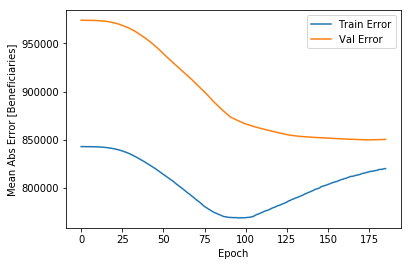

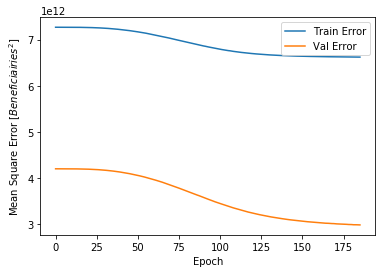

In [38]:
plot_history(history)

In [39]:
#Predict using test dataset
test_predictions = model.predict(X_test).flatten()

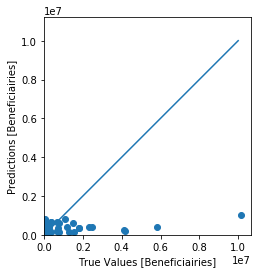

In [40]:
# Visualise the predicted numbers and real numbers
plt.scatter(Y_val, test_predictions)
plt.xlabel('True Values [Beneficiairies]')
plt.ylabel('Predictions [Beneficiairies]')
plt.axis('auto')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 1e7], [-100,  1e7])

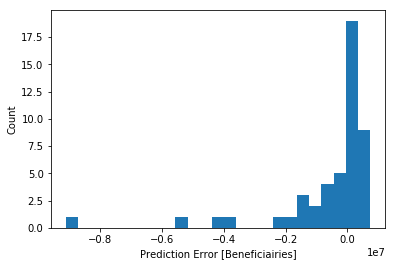

In [41]:
# Visualise errors
error = test_predictions-Y_val['peoples'].tolist()
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Beneficiairies]")
_ = plt.ylabel("Count")

In [42]:
# Save entire model to a HDF5 file for futurs predictions
model.save('my_model.h5')